In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
train_data = pd.read_csv("fraudtrain.csv")
test_data = pd.read_csv("fraudtest.csv")

In [3]:
print("Train data missing values:\n", train_data.isnull().sum())
print("Test data missing values:\n", test_data.isnull().sum())

Train data missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Test data missing values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state         

In [4]:
train_data = pd.get_dummies(train_data, columns=['category', 'gender', 'state'])
test_data = pd.get_dummies(test_data, columns=['category', 'gender', 'state'])

In [5]:
train_data, test_data = train_data.align(test_data, join='inner', axis=1)

In [6]:
X_train = train_data.drop(['is_fraud', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'zip', 'job', 'dob', 'trans_num'], axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop(['is_fraud', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'zip', 'job', 'dob', 'trans_num'], axis=1)
y_test = test_data['is_fraud']

In [8]:
# Drop non-numeric and irrelevant columns
non_numeric_columns = ['trans_date_trans_time', 'first', 'last', 'street', 'city', 'zip', 'job', 'dob', 'trans_num', 'merchant']
X_train = train_data.drop(non_numeric_columns + ['is_fraud'], axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop(non_numeric_columns + ['is_fraud'], axis=1)
y_test = test_data['is_fraud']

# Verify if all columns are now numeric
print("Columns in X_train after dropping non-numeric columns:\n", X_train.dtypes)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now you can proceed with model training and evaluation


Columns in X_train after dropping non-numeric columns:
 Unnamed: 0      int64
cc_num          int64
amt           float64
lat           float64
long          float64
               ...   
state_VT        uint8
state_WA        uint8
state_WI        uint8
state_WV        uint8
state_WY        uint8
Length: 75, dtype: object


In [9]:
logistic_model = LogisticRegression(random_state=0)
decision_tree_model = DecisionTreeClassifier(random_state=0)
random_forest_model = RandomForestClassifier(random_state=0)

In [10]:
print("\nLogistic Regression Results:")
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Results:


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9960285683951782
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
 [[553512     62]
 [  2145      0]]


In [11]:
print("\nDecision Tree Results:")
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.9913283511990773
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.24      0.59      0.34      2145

    accuracy                           0.99    555719
   macro avg       0.62      0.79      0.67    555719
weighted avg       1.00      0.99      0.99    555719

Confusion Matrix:
 [[549640   3934]
 [   885   1260]]


In [12]:
print("\nRandom Forest Results:")
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))


Random Forest Results:
Accuracy: 0.9974123612833105
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.80      0.44      0.57      2145

    accuracy                           1.00    555719
   macro avg       0.90      0.72      0.78    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
 [[553346    228]
 [  1210    935]]


In [15]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = []

In [16]:
print("\nLogistic Regression Results:")
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracies.append(accuracy_logistic)
print("Accuracy:", accuracy_logistic)
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Results:


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9960285683951782
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
 [[553512     62]
 [  2145      0]]


In [18]:
print("\nDecision Tree Results:")
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracies.append(accuracy_tree)
print("Accuracy:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))



Decision Tree Results:
Accuracy: 0.9913283511990773
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.24      0.59      0.34      2145

    accuracy                           0.99    555719
   macro avg       0.62      0.79      0.67    555719
weighted avg       1.00      0.99      0.99    555719

Confusion Matrix:
 [[549640   3934]
 [   885   1260]]


In [19]:
print("\nRandom Forest Results:")
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
accuracies.append(accuracy_forest)
print("Accuracy:", accuracy_forest)
print(classification_report(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))



Random Forest Results:
Accuracy: 0.9974123612833105
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.80      0.44      0.57      2145

    accuracy                           1.00    555719
   macro avg       0.90      0.72      0.78    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
 [[553346    228]
 [  1210    935]]


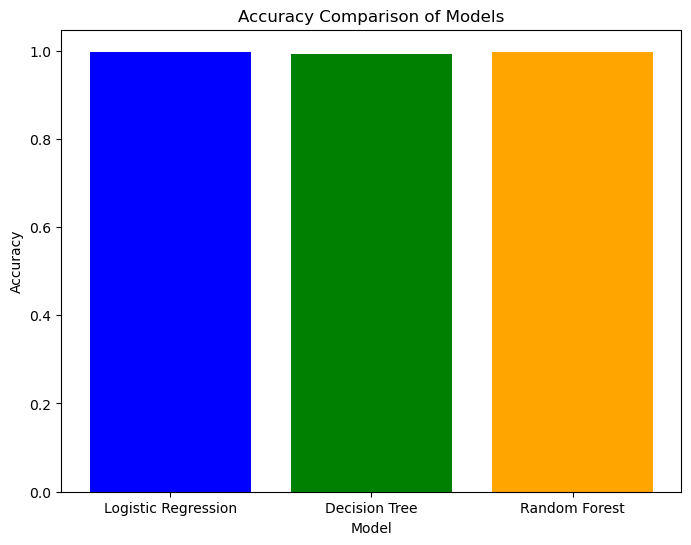

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")
plt.show()

In [22]:
best_model_name = model_names[accuracies.index(max(accuracies))]
print(f"\nThe model with the highest accuracy is: {best_model_name}")


The model with the highest accuracy is: Random Forest
